#### This dataset includes complete country wise information on various parameters of developmental indicators  from 1960-2014 
#### I believe that data analysis on this dataset will help us to understand better about quality of life in different countries and continents

In [61]:
import pandas as pd  #importing various python modules to implement various functions
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import datetime
import string
import statistics as stat

In [62]:
df = pd.read_excel(r"/Users/iqrabismi/Desktop/development_indicators.xlsx")  #loading the data into dataframe

In [63]:
df.head()  # displaying the first five rows

,date,Continent,Sub Region,Country,GDP per Capita,GDP per Capita (Grouped),Life Expectancy,Life Expectancy (Grouped),C02 Emissions per Person (Tonnes),Child Mortality Rate (per 1000 births)
0,1960-11-11 00:00:00,Asia,Southern Asia,Afghanistan,1210,<5000,38.6,0-40,0.0461,364.0
1,1960-02-21 00:00:00,Europe,Southern Europe,Albania,2790,<5000,62.7,>60,1.2400,188.0
2,1960-09-23 00:00:00,Africa,Northern Africa,Algeria,6520,>= 5000 and <20000,52.0,>=50 and <= 60,0.5540,245.0
3,1960-08-22 00:00:00,Europe,Southern Europe,Andorra,15200,>= 5000 and <20000,NaN,NaN,NaN,NaN
4,1960-07-24 00:00:00,Africa,Middle Africa,Angola,3860,<5000,42.4,>=40 and < 50,0.0975,305.0


## Step1: Data Cleanup

In [64]:
#editing the column name
df.columns= df.columns.str.capitalize() #making the only the first letter in uppercase
df.columns=["Date","Continent","Sub_region","Country","GDP_per_Capita","GDP_grouped","Life_expectancy","Life_expectancy_grouped","Co2_emissions_per_person","Child_mortality_rate"]
df.head()

,Date,Continent,Sub_region,Country,GDP_per_Capita,GDP_grouped,Life_expectancy,Life_expectancy_grouped,Co2_emissions_per_person,Child_mortality_rate
0,1960-11-11 00:00:00,Asia,Southern Asia,Afghanistan,1210,<5000,38.6,0-40,0.0461,364.0
1,1960-02-21 00:00:00,Europe,Southern Europe,Albania,2790,<5000,62.7,>60,1.2400,188.0
2,1960-09-23 00:00:00,Africa,Northern Africa,Algeria,6520,>= 5000 and <20000,52.0,>=50 and <= 60,0.5540,245.0
3,1960-08-22 00:00:00,Europe,Southern Europe,Andorra,15200,>= 5000 and <20000,NaN,NaN,NaN,NaN
4,1960-07-24 00:00:00,Africa,Middle Africa,Angola,3860,<5000,42.4,>=40 and < 50,0.0975,305.0


In [65]:
#counting the number of null values if any 
k = df.isna().sum().sum() 
#checking the values column-wise
l = df.isna().sum() 
print(k)
print(l)

632
Date                          0
Continent                     0
Sub_region                    0
Country                       0
GDP_per_Capita                0
GDP_grouped                   0
Life_expectancy              30
Life_expectancy_grouped      30
Co2_emissions_per_person    547
Child_mortality_rate         25
dtype: int64


In [66]:
# above data tell us there are null values in four catgories
#filling the null values using bfill() to backward fill the values 
df["Life_expectancy"]=df["Life_expectancy"].bfill()
df["Life_expectancy_grouped"]=df["Life_expectancy_grouped"].bfill()
df["Co2_emissions_per_person"]=df["Co2_emissions_per_person"].bfill()
df["Child_mortality_rate"]=df["Child_mortality_rate"].bfill()
k= df.isna().sum().sum()
l=df.isna().sum()
print(k)
print(l)  #null values are removed 

0
Date                        0
Continent                   0
Sub_region                  0
Country                     0
GDP_per_Capita              0
GDP_grouped                 0
Life_expectancy             0
Life_expectancy_grouped     0
Co2_emissions_per_person    0
Child_mortality_rate        0
dtype: int64


In [67]:
#checking the datatype of all columns 
df.dtypes

Date                         object
Continent                    object
Sub_region                   object
Country                      object
GDP_per_Capita                int64
GDP_grouped                  object
Life_expectancy             float64
Life_expectancy_grouped      object
Co2_emissions_per_person    float64
Child_mortality_rate        float64
dtype: object

In [68]:
#setting the index so that index starts from 1
k = [i for i in range(1,len(df)+1)]
df.set_index([pd.Index(k)])

,Date,Continent,Sub_region,Country,GDP_per_Capita,GDP_grouped,Life_expectancy,Life_expectancy_grouped,Co2_emissions_per_person,Child_mortality_rate
1,1960-11-11 00:00:00,Asia,Southern Asia,Afghanistan,1210,<5000,38.6,0-40,0.0461,364.0
2,1960-02-21 00:00:00,Europe,Southern Europe,Albania,2790,<5000,62.7,>60,1.2400,188.0
3,1960-09-23 00:00:00,Africa,Northern Africa,Algeria,6520,>= 5000 and <20000,52.0,>=50 and <= 60,0.5540,245.0
4,1960-08-22 00:00:00,Europe,Southern Europe,Andorra,15200,>= 5000 and <20000,42.4,>=40 and < 50,0.0975,305.0
5,1960-07-24 00:00:00,Africa,Middle Africa,Angola,3860,<5000,42.4,>=40 and < 50,0.0975,305.0
...,...,...,...,...,...,...,...,...,...,...
8906,2000-06-26 00:00:00,Oceania,Micronesia,Kiribati,2010,<5000,59.5,>=50 and <= 60,0.3480,70.6
8907,2001-08-17 00:00:00,Oceania,Micronesia,Kiribati,1940,<5000,59.7,>=50 and <= 60,0.2990,68.6
8908,2002-03-13 00:00:00,Oceania,Micronesia,Kiribati,1980,<5000,59.8,>=50 and <= 60,0.4620,66.9
8909,2003-10-16 00:00:00,Oceania,Micronesia,Kiribati,1990,<5000,59.9,>=50 and <= 60,0.4540,65.7


## Step 2: Analysis

#### Firstly,we will look into the which continent has the life expectancy and in which year
#### Secondly,analysis will help us to find relation between child mortality   and life expectancy.This will give us insights about the quality of life in different countries
#### Also, we further aim to find study GDP of different countries wrt year and how it is related to other parameters 
#### Lastly, with the help of analysis we aim to study trend in increase or decrease in parameters of development indicators. This will also help to gain insights that which country is in the developmental phase and which is developed 

In [69]:
pivottable= pd.pivot_table(index="Continent",columns= pd.DatetimeIndex(df['Date']).year, data=df).apply(lambda s: s.apply('{0:.0f}'.format))
pivottable #with year-wise table below, we can study detail about criminal activities wrt. to state and different categories


Child_mortality_rate                                               \
Date                      1960 1961 1962 1963 1964 1965 1966 1967 1968 1969   
Continent                                                                     
Africa                     263  258  254  249  245  241  237  233  230  226   
Americas                   127  123  119  116  112  109  106  103  100   98   
Asia                       199  192  184  178  171  166  161  156  152  147   
Europe                      61   57   55   53   50   48   46   38   36   35   
Oceania                    123  119  114  110  106  102   98   94   90   87   

           ... Life_expectancy                                               
Date       ...            2005 2006 2007 2008 2009 2010 2011 2012 2013 2014  
Continent  ...                                                               
Africa     ...              58   59   59   60   60   61   61   62   63   63  
Americas   ...              74   74   74   74   74   73   75   75   75   75  
Asia       ...              71   71   72   72   72   73   73   73   74   74  
Europe     ...              77   77   77   78   78   78   78   79   79   79  
Oceania    ...              67   67   67   67   67   68   68   68   68   68  

[5 rows x 220 columns]

In [70]:
pivottable= pivottable.astype(int)
pivottable.idxmax(axis=1)  # Hence, this shows that GDP per Capita was maximum for America and Asia in 2014 
#Maximum for Europe in 2008

Continent
Africa      (GDP_per_Capita, 2013)
Americas    (GDP_per_Capita, 2014)
Asia        (GDP_per_Capita, 2014)
Europe      (GDP_per_Capita, 2008)
Oceania     (GDP_per_Capita, 2014)
dtype: object

In [71]:
#using groupby function to calculate the values under various parameters
k= df.groupby([pd.DatetimeIndex(df['Date']).year,"Continent","Country"], sort=False).median() # taking median because of outliers
k.head(60) 

GDP_per_Capita  Life_expectancy  \
Date Continent Country                                                     
1960 Asia      Afghanistan                       1210.0             38.6   
     Europe    Albania                           2790.0             62.7   
     Africa    Algeria                           6520.0             52.0   
     Europe    Andorra                          15200.0             42.4   
     Africa    Angola                            3860.0             42.4   
     Americas  Antigua and Barbuda               4420.0             62.9   
               Argentina                         9030.0             64.1   
     Asia      Armenia                           2520.0             62.0   
     Oceania   Australia                        14300.0             71.3   
     Europe    Austria                          12100.0             68.7   
     Asia      Azerbaijan                        5080.0             57.8   
     Americas  Bahamas                          14800.0             61.9   
     Asia      Bahrain                          22600.0             52.8   
               Bangladesh                        1060.0             43.8   
     Americas  Barbados                          4990.0             64.5   
     Europe    Belarus                           3950.0             70.6   
               Belgium                          12600.0             69.6   
     Americas  Belize                            2010.0             60.7   
     Africa    Benin                             1190.0             41.1   
     Asia      Bhutan                             951.0             41.7   
     Europe    Bosnia and Herzegovina            1760.0             60.6   
     Africa    Botswana                           972.0             52.1   
     Americas  Brazil                            4440.0             56.8   
     Europe    Bulgaria                          4860.0             69.0   
     Africa    Burkina Faso                       659.0             38.6   
               Burundi                            645.0             42.0   
     Asia      Cambodia                          1550.0             43.9   
     Africa    Cameroon                          1850.0             46.1   
     Americas  Canada                           14500.0             71.1   
     Africa    Central African Republic          1430.0             41.4   
               Chad                              1470.0             44.5   
     Americas  Chile                             5940.0             58.2   
     Asia      China                              891.0             30.9   
     Americas  Colombia                          3480.0             61.0   
     Africa    Comoros                           1030.0             46.3   
     Americas  Costa Rica                        4260.0             63.4   
     Europe    Croatia                           7680.0             64.4   
     Americas  Cuba                              9420.0             65.6   
     Asia      Cyprus                            5520.0             67.7   
     Europe    Czech Republic                   11900.0             70.6   
               Denmark                          15300.0             72.2   
     Africa    Djibouti                          3760.0             52.6   
     Americas  Dominica                          2420.0             57.0   
               Dominican Republic                2650.0             57.0   
               Ecuador                           4450.0             57.5   
     Africa    Egypt                             2030.0             47.5   
     Americas  El Salvador                       4000.0             53.2   
     Africa    Equatorial Guinea                  659.0             40.5   
               Eritrea                            919.0             41.4   
     Europe    Estonia                           7200.0             69.2   
     Africa    Ethiopia                           656.0             39.0   
     Oceania 

In [75]:
print(k.idxmin())

print("\n")

print(k.idxmax())

GDP_per_Capita              (1995, Africa, Liberia)
Life_expectancy              (1994, Africa, Rwanda)
Co2_emissions_per_person     (1979, Asia, Cambodia)
Child_mortality_rate        (2013, Europe, Iceland)
dtype: object


GDP_per_Capita              (1980, Asia, United Arab Emirates)
Life_expectancy                            (2014, Asia, Japan)
Co2_emissions_per_person    (1969, Asia, United Arab Emirates)
Child_mortality_rate                      (1960, Africa, Mali)
dtype: object


#### these values above shows that in Max and Min values of developmental indicators wrt to year and countries

In [77]:
#sorting the data by Area-wise
g = df.groupby("Sub_region").sum().apply(lambda s: s.apply('{0:.0f}'.format))
g["Sub_region"]= [i for i in g.index] #defining new column
newindex=[i for i in range(1,len(g.index)+1)] #assigning new index to the dataframe
g1=g.set_index([pd.Index(newindex)]) 
g1  # we will be further using this dataframe in graph visualisation

,GDP_per_Capita,Life_expectancy,Co2_emissions_per_person,Child_mortality_rate,Sub_region
1,2886600,8346,1166,1424,Australia and New Zealand
2,5671850,37733,2559,27567,Caribbean
3,2945710,29923,550,31410,Central America
4,1536560,14023,1731,20999,Central Asia
5,2432643,50803,457,146999,Eastern Africa
6,1722529,11100,780,11178,Eastern Asia
7,4797940,27316,3260,8985,Eastern Europe
8,630524,13069,132,15001,Melanesia
9,297470,6616,135,9414,Micronesia
10,2002055,20575,412,66478,Middle Africa


#### Was Crime Investigation Department efficient enough in solving the cases?

In [87]:
# combining data to year-wise to study various trends 
yearwise= df.groupby(pd.DatetimeIndex(df['Date']).year).mean().apply(lambda s: s.apply('{0:.0f}'.format))  
yearwise["Life_expectancy"]=yearwise["Life_expectancy"].astype(int)
yearwise["rate_lifeexpectancy"]= round(yearwise.Life_expectancy.pct_change()*100)
yearwise

,GDP_per_Capita,Life_expectancy,Co2_emissions_per_person,Child_mortality_rate,rate_lifeexpectancy
Date,,,,,
1960,5098,55,2,171,NaN
1961,5310,56,2,166,2.0
1962,5519,56,2,161,0.0
1963,5755,57,3,157,2.0
1964,6169,57,3,153,0.0
1965,6530,58,3,149,2.0
1966,6897,58,3,145,0.0
1967,7291,59,4,140,2.0
1968,7825,59,4,137,0.0


#### above table shows rate at which life expectancy increases wrt to year.

## Rate at which GDP increases or decreases from 1960-2014

In [88]:
#grouping the data by yearwise by taking the median values(As median is resistant to outlier) of all categories

yearwise["GDP_per_Capita"]=yearwise["GDP_per_Capita"].astype(int)
yearwise["rate_GDP_per_Capita"]= round(yearwise.GDP_per_Capita.pct_change()*100) 
yearwise

,GDP_per_Capita,Life_expectancy,Co2_emissions_per_person,Child_mortality_rate,rate_lifeexpectancy,rate_GDP_per_Capita
Date,,,,,,
1960,5098,55,2,171,NaN,NaN
1961,5310,56,2,166,2.0,4.0
1962,5519,56,2,161,0.0,4.0
1963,5755,57,3,157,2.0,4.0
1964,6169,57,3,153,0.0,7.0
1965,6530,58,3,149,2.0,6.0
1966,6897,58,3,145,0.0,6.0
1967,7291,59,4,140,2.0,6.0
1968,7825,59,4,137,0.0,7.0


In [91]:
# hence, the above table above shows that crime increased in most years, although it decreased in initial two years.
total_increase_in_GDP= ((17283-5098)/5098)*100
print("total increase in rate of cases from 1960 to 2014 :",round(total_increase_in_GDP,2),"%")

total increase in rate of cases from 1960 to 2014 : 239.02 %


## Step6: Visual Exploratory Data Analysis

## Graph wrt to Life expectancy in continents by crime-type

In [94]:
df["year"]=pd.DatetimeIndex(df['Date']).year

/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_6377/1134153093.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


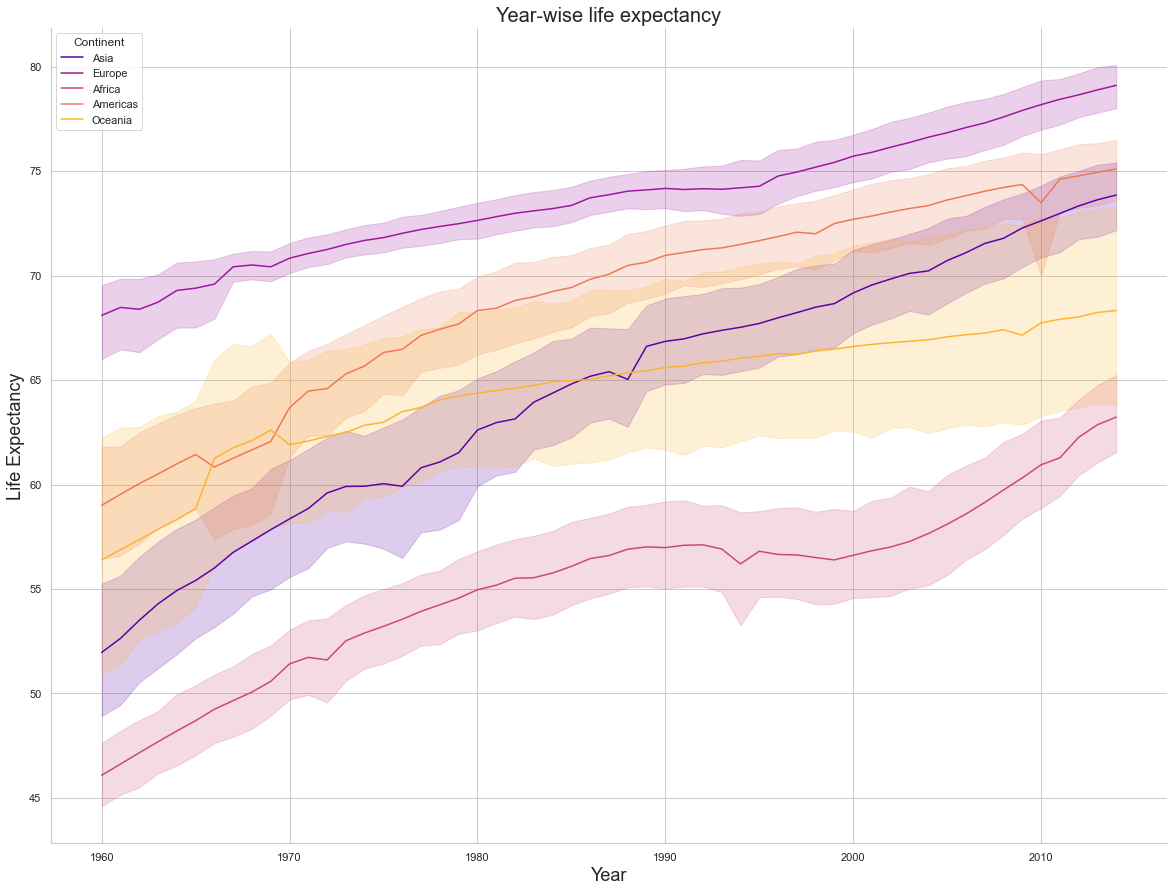

In [101]:
figure, ax = plt.subplots(figsize = ( 20 , 15 ))
sns.despine()
sns.set(style="whitegrid")
sns.lineplot(data=df,x="year",y="Life_expectancy" ,hue="Continent",palette="plasma")
plt.xlabel("Year", size=18)
plt.ylabel("Life Expectancy", size=18)
plt.title("Year-wise life expectancy", size= 20)
current_values = plt.gca().get_yticks()

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()  #from this we can see that europe had the highest life ecpectancy in all these years

## Heatmap of developmental indicators wrt. Year

In [105]:
yearwise.dtypes

GDP_per_Capita                int64
Life_expectancy               int64
Co2_emissions_per_person      int64
Child_mortality_rate          int64
rate_lifeexpectancy         float64
rate_GDP_per_Capita         float64
dtype: object

<AxesSubplot:ylabel='Date'>

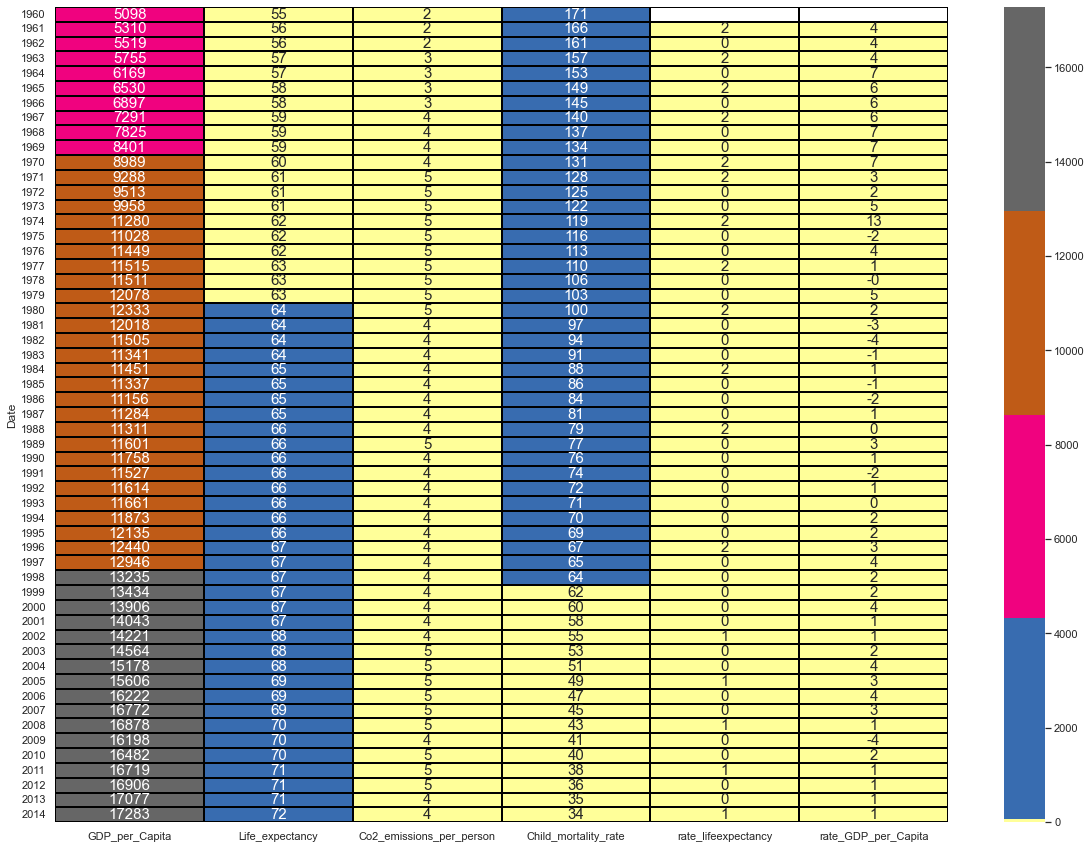

In [107]:
figure, ax = plt.subplots(figsize = ( 20 , 15 ))
sns.heatmap(data=yearwise,cmap="Accent", annot=True,linewidth=2,linecolor="black",fmt='g',center=0,annot_kws={'size': 15})


## Linechart depicting total GDP_per_Capita

/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_6377/2465880001.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


Text(0.5, 0, 'GDP_per_Capita')

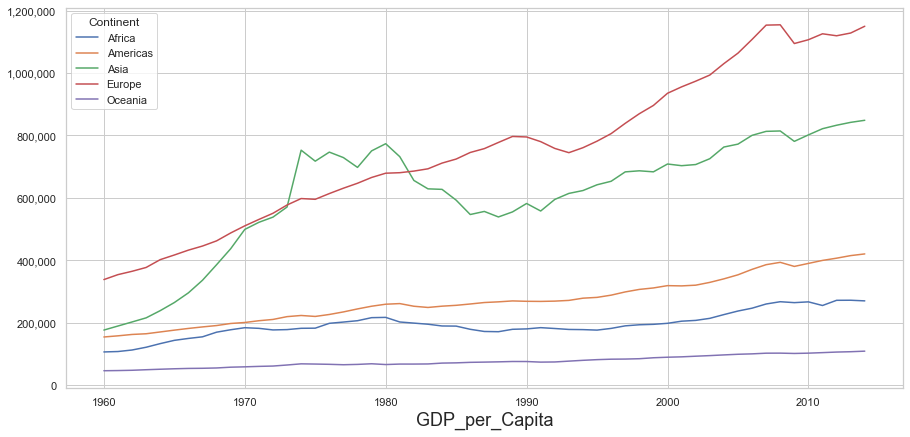

In [115]:
fig, ax = plt.subplots(figsize=(15,7))

df.groupby(['year','Continent']).sum()['GDP_per_Capita'].unstack().plot(ax=ax)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.xlabel("GDP_per_Capita", size= 18)

this shows that for Asia GDP per capital fluctuated the most wrt to other continents

/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_6377/2676878796.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


Text(0.5, 0, 'GDP_per_Capita')

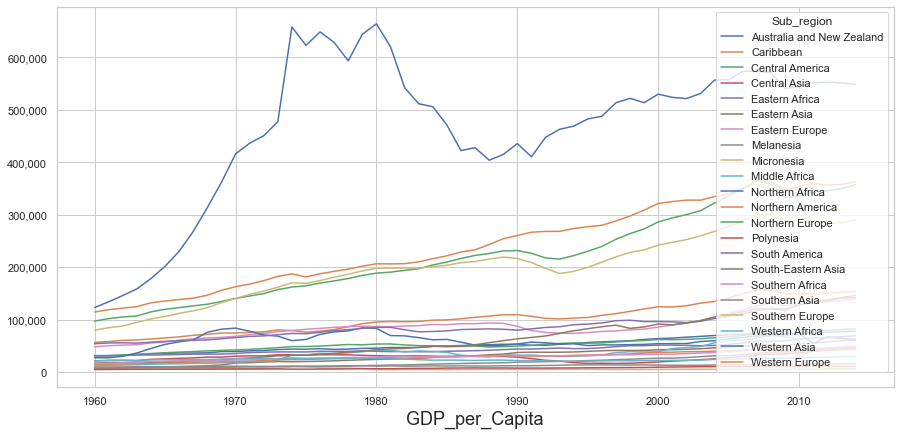

In [116]:
fig, ax = plt.subplots(figsize=(15,7))

df.groupby(['year','Sub_region']).sum()['GDP_per_Capita'].unstack().plot(ax=ax)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.xlabel("GDP_per_Capita", size= 18)

this shows that Australia and New zealand had the highest gdp per capital from 1960-2014

## Region with most child mortality rate

In [120]:
g1["Child_mortality_rate"]=g1["Child_mortality_rate"].astype(int)

/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_6377/1644531643.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


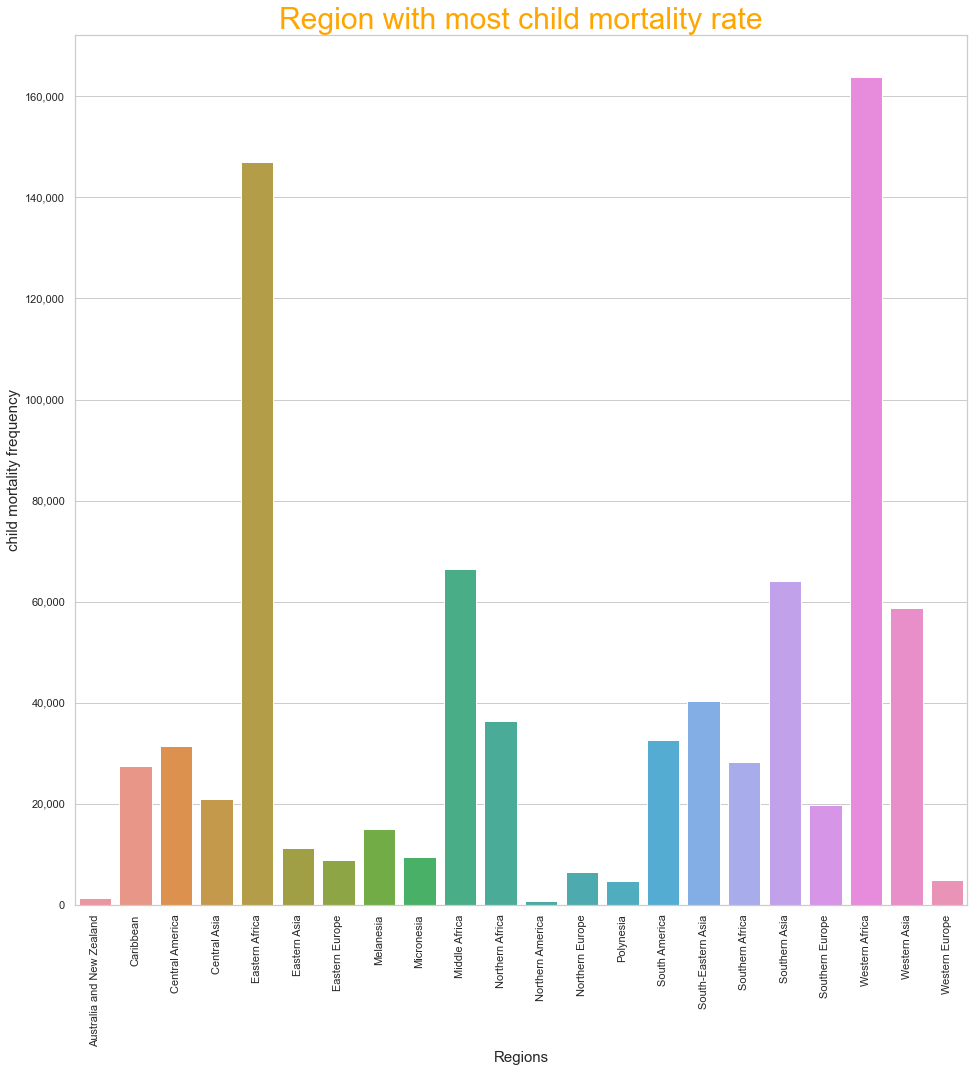

In [123]:
fig, ax = plt.subplots(figsize=(16,16))
sns.color_palette("husl", 9)

splot=sns.barplot(data=g1,x="Sub_region",y="Child_mortality_rate")

plt.title('Region with most child mortality rate',fontsize = 30, color='orange')
plt.ylabel("child mortality frequency", size=15)
plt.xlabel("Regions", size=15)
plt.xticks(rotation = 90)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show() 

#### above barplot shows that western africa had the   highest number of child mortality while northern america had the lowest number of child mortality 

## Strip plot showing co2 emissions in different continents

<AxesSubplot:xlabel='Continent', ylabel='Co2_emissions_per_person'>

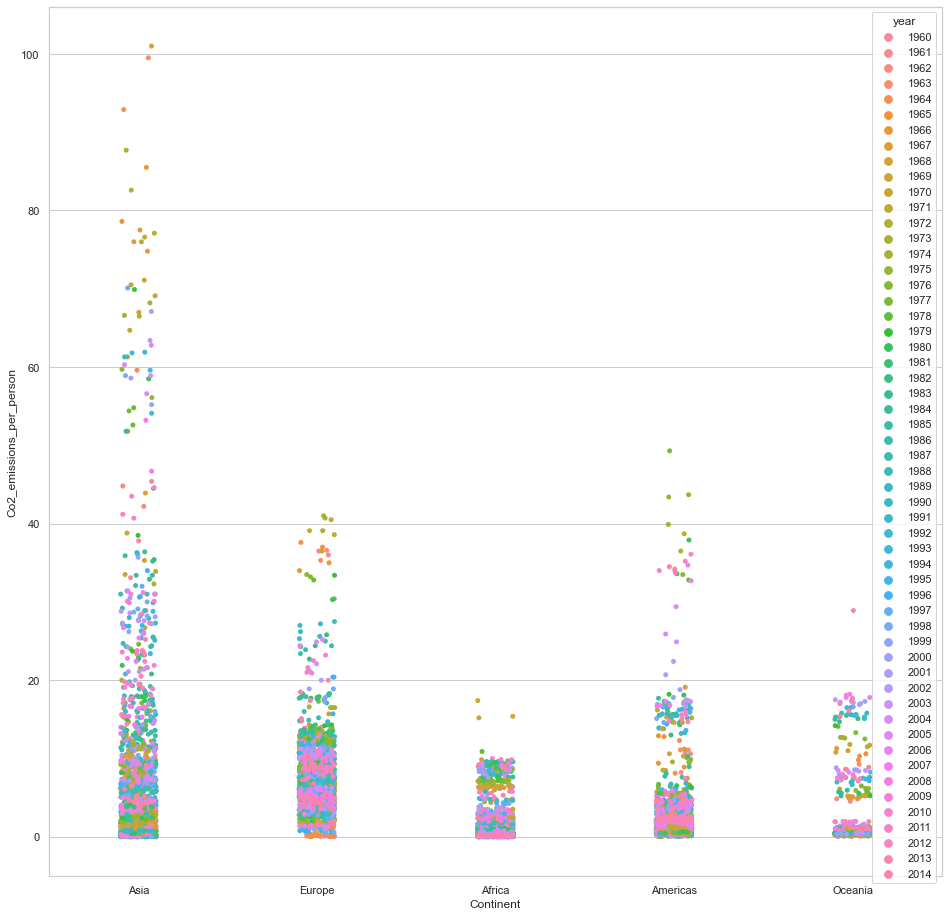

In [129]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(16,16))
sns.color_palette("husl", 9)
sns.stripplot(data=df,x="Continent",y="Co2_emissions_per_person",hue="year")

## How does crime in India increases or decreases wrt to previous year. Which state showed the most variation.

In [132]:

yearwise

,GDP_per_Capita,Life_expectancy,Co2_emissions_per_person,Child_mortality_rate,rate_lifeexpectancy,rate_GDP_per_Capita
Date,,,,,,
1960,5098,55,2,171,NaN,NaN
1961,5310,56,2,166,2.0,4.0
1962,5519,56,2,161,0.0,4.0
1963,5755,57,3,157,2.0,4.0
1964,6169,57,3,153,0.0,7.0
1965,6530,58,3,149,2.0,6.0
1966,6897,58,3,145,0.0,6.0
1967,7291,59,4,140,2.0,6.0
1968,7825,59,4,137,0.0,7.0


#### above graph shows that total criminal cases for Maharashtra and Madhya Pradesh  cases were significantly higher in ten year period, although fluctuations were present in maximum states

## Barplot showing comparison between solved and unsolved cases in ten years

In [91]:
yearwise #preparing the data

,Cases_solved,Cases_unsolved,Amount_recovered,Amount_stolen,percent_case_unresolved,percent_cases_solved,Amount_recovered_ratio,solved_Ratio,Year
1,106,366,3659,16337,77,22,0.182987,0.224576,2001
2,123,378,4332,19472,75,24,0.181986,0.245509,2002
3,108,307,4305,17474,73,26,0.197667,0.260241,2003
4,99,311,4853,18938,75,24,0.203985,0.241463,2004
5,107,347,4979,23371,76,23,0.175626,0.235683,2005
6,115,367,6385,29935,76,23,0.175798,0.238589,2006
7,117,414,8691,33463,77,22,0.206173,0.220339,2007
8,114,355,7860,43777,75,24,0.152216,0.243070,2008
9,114,380,12401,48400,76,23,0.203960,0.230769,2009
10,122,388,10255,39538,76,23,0.205953,0.239216,2010


#### piechart

#### donut chart

## Insights: